In [701]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

***
# What data will we use?
Since we are planning on performing multiple linear regression, we want a small but diverse dataset. In the following notebook, we will be examining the relationship between a set of variables and life expectancy. <br>
Dataset: https://www.kaggle.com/kumarajarshi/life-expectancy-who

In [818]:
df = pd.read_csv(R'C:\Users\voyno\OneDrive\Desktop\Python Projects\Life Expectancy Data.csv')

In [819]:
df.columns = ['Country',
              'Year', 
              'Status', 
              'Life expectancy', 
              'Adult Mortality',
              'infant deaths', 
              'Alcohol', 
              'Expenditure%', 
              'Hepatitis B',
              'Measles', 
              'BMI', 
              'deaths<5', 
              'Polio', 
              'ExpenditureTot',
              'Diphtheria', 
              'HIV/AIDS', 
              'GDP', 
              'Population',
              'thinness1-19', 
              'thinness5-9',
              'ICoR', 
              'Schooling']

***
# Lets clean our data
There are a few things we need to tidy up. <br>
1. Lets remove the country attribute, it is a sparse categorical variable
2. We need to transform our status feature into a binary encoding
3. If there are any null values at this point, we can remove that section of data
4. The column names can be changed to more convenient/concise values
5. Finally, we can separate our data into independent vs dependent variables
***

In [820]:
df.drop(['Country'], axis=1, inplace=True)

In [821]:
status_dev = np.where(df['Status'].values == 'Developing')[0]
status_nondev = np.where(df['Status'].values != 'Developing')[0]

new_status = np.zeros(len(df['Status'].values))
new_status[status_dev] = 1
new_status[status_nondev] = 0
df['Status'] = new_status

In [822]:
df.drop(np.where(np.sum(df.isnull().values, axis=1) != 0)[0], axis=0, inplace=True)

In [823]:
y = df['Life expectancy']
df.drop(['Life expectancy'], axis=1, inplace=True)

***
# Our data is ready
Now we need to examine the relationships amongst our data.
1. We can only do linear regression if our independent variables are <strong>correlated</strong> with our dependent variable.
2. The performance of our regression will decrease significantly if we have a strong presence of multicollinearity.
(To determine this we can examine the relationship amongst our independent variables)
***

In [824]:
# Correlation between our individual features and our target
# remove features that have little correlation
for column in df.columns:
    column_corr = np.corrcoef(df[column].values, y.values)[0,1]
    if np.absolute(column_corr) < .35:
        print(format(column,'15s'),"=", format(column_corr,'.3f'))
        df.drop([column], axis=1, inplace=True)

Year            = 0.051
infant deaths   = -0.169
Hepatitis B     = 0.200
Measles         = -0.069
deaths<5        = -0.192
Polio           = 0.327
ExpenditureTot  = 0.175
Diphtheria      = 0.341
Population      = -0.022


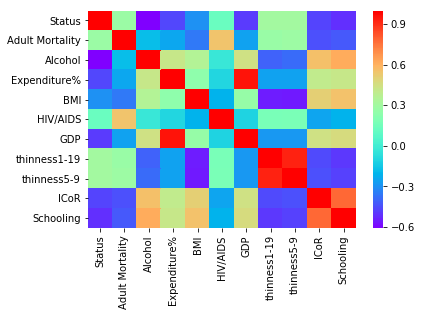

In [828]:
# Correlation amongst our individual features, in depth
sns.heatmap(df.corr(), cmap='rainbow')

In [829]:
# We might have some multicollinearity issues because of this,
# lets take a closer look at the correlation amongst our individual features
for column in df.columns:
    print("\n\n\033[1m",column,"\033[0m")
    print("- "*40)
    for _column in df.columns:
        if column != _column:
            column_corr = np.corrcoef(df[column].values, df[_column].values)[0,1]
            print("\t", format(_column,'11s'),"=", format(column_corr,'.3f'))
    print("- "*40)



 Status 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
	 Adult Mortality = 0.278
	 Alcohol     = -0.608
	 Expenditure% = -0.462
	 BMI         = -0.298
	 HIV/AIDS    = 0.130
	 GDP         = -0.485
	 thinness1-19 = 0.308
	 thinness5-9 = 0.307
	 ICoR        = -0.464
	 Schooling   = -0.513
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


 Adult Mortality 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
	 Status      = 0.278
	 Alcohol     = -0.176
	 Expenditure% = -0.238
	 BMI         = -0.352
	 HIV/AIDS    = 0.551
	 GDP         = -0.255
	 thinness1-19 = 0.272
	 thinness5-9 = 0.287
	 ICoR        = -0.442
	 Schooling   = -0.421
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


 Alcohol 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
	 Status      = -0.608
	 Adult Mortality = -0.176
	 Expenditure% = 0.417
	 BMI         = 0.3

In [850]:
# To again continue our multicollinearity investigation, lets calculate VIF

# old df
print("- "*40)
for i in range(len(df.columns)):
    vif = stats.outliers_influence.variance_inflation_factor(df.values, i)
    print(format(df.columns[i],'15s'), ":", format(vif,'.3f'))
    
# remove features
droplist= ['Schooling','thinness5-9','ICoR', 'GDP', 'Status']
new_df = df.drop(droplist, axis=1)

# new df
print("- "*40)
for i in range(len(new_df.columns)):
    vif = stats.outliers_influence.variance_inflation_factor(new_df.values, i)
    print(format(new_df.columns[i],'15s'), ":", format(vif,'.3f'))

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Status          : 8.954
Adult Mortality : 4.332
Alcohol         : 4.920
Expenditure%    : 14.695
BMI             : 8.211
HIV/AIDS        : 1.608
GDP             : 16.660
thinness1-19    : 15.334
thinness5-9     : 15.647
ICoR            : 36.170
Schooling       : 48.491
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Adult Mortality : 3.454
Alcohol         : 2.928
Expenditure%    : 1.455
BMI             : 3.129
HIV/AIDS        : 1.573
thinness1-19    : 1.965


# Modeling
We have now removed variables of two types:
1. Independent variables with little correlation to our dependent variable
2. Independent variables with strong signs of multicollinearity

In [851]:
# split data into train vs test
x_train, x_test, y_train, y_test = train_test_split(new_df.values, y, test_size=0.1, random_state=0)

In [853]:
# LR model
# fit to train data
# score on test
model = LinearRegression()
model.fit(x_train, y_train)
print("Acc:",model.score(x_test, y_test))

Acc: 0.7329416832073725


# The Wrap Up
For this set of data, the accuracy we received could possibly be higher. The reason for this low accuracy is our focus on multicollinearity. It seems that the features with the highest VIF's also have high correlation to our dependent variable. <br><br>This fun-with-statistics series is all about learning new skills and applying them <strong>correctly</strong>. We could get a higher accuracy by simply throwing our entire dataset into a linear regression model, but then what would we learn/gain? Hopefully in future notebooks we can explore how to mitigate this VIF/accuracy trade-off that I believe we have found. But for now, this is goodbye.